## Part 1: Preprocessing and EDA

### Problem 1: Dataset Import & Cleaning

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
orders = pd.read_csv('data/Orders.csv')

In [3]:
orders.shape

(51290, 24)

In [4]:
pd.options.display.max_columns = 30

In [5]:
orders.sample(5)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
51146,31092,ID-2012-SH2039592-41224,11/11/12,11/14/12,First Class,SH-2039592,Shahid Hopkins,Consumer,NaN,Auckland,Auckland,New Zealand,Oceania,Asia Pacific,OFF-BI-3718,Office Supplies,Binders,"Cardinal Binder Covers, Economy",$7.20,1,0.40,-$3.60,1.07,High
43415,23429,IN-2013-CS121757-41394,4/30/13,5/5/13,Standard Class,CS-121757,Charles Sheldon,Corporate,NaN,Toowoomba,Queensland,Australia,Oceania,Asia Pacific,OFF-LA-4534,Office Supplies,Labels,"Harbour Creations File Folder Labels, Adjustable",$5.97,1,0.10,-$0.09,1.82,High
2646,13804,ES-2014-TB21595120-41800,6/10/14,6/11/14,First Class,TB-21595120,Troy Blackwell,Consumer,NaN,Madrid,Madrid,Spain,Southern Europe,Europe,OFF-AR-5920,Office Supplies,Art,"Sanford Markers, Water Color",$370.02,14,0.00,$33.18,109.19,High
1723,25237,ID-2012-EH14125102-41097,7/7/12,7/12/12,Standard Class,EH-14125102,Eugene Hildebrand,Home Office,NaN,Manila,National Capital,Philippines,Southeastern Asia,Asia Pacific,TEC-MA-5548,Technology,Machines,"Panasonic Inkjet, White","$1,630.13",7,0.25,-$282.56,147.98,Medium
2283,19685,IT-2014-ML17395120-41794,6/4/14,6/7/14,Second Class,ML-17395120,Marina Lichtenstein,Corporate,NaN,Valladolid,Castile and León,Spain,Southern Europe,Europe,OFF-ST-5707,Office Supplies,Storage,"Rogers Shelving, Single Width",$447.55,8,0.10,-$10.13,122.68,Critical


In [6]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [7]:
# convert Profit and Sales columns to numeric type. 
import re
orders.Profit = orders.Profit.map(lambda x: float(re.sub('[$,]', '', x)))
orders.Sales = orders.Sales.map(lambda x: float(re.sub('[,$]', '', x)))

In [8]:
orders.sample(5)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
17763,38934,CA-2015-DB13555140-42066,3/3/15,3/9/15,Standard Class,DB-135551406,Dorothy Badders,Corporate,19711.0,Newark,Delaware,United States,Eastern US,USCA,OFF-AR-5319,Office Supplies,Art,Newell 34,59.52,3,0.0,15.48,4.34,Medium
38323,38091,CA-2013-MC17605140-41594,11/16/13,11/20/13,Standard Class,MC-176051402,Matt Connell,Corporate,60610.0,Chicago,Illinois,United States,Central US,USCA,TEC-PH-4793,Technology,Phones,HTC One,239.98,3,0.2,27.00,15.01,Medium
3475,36993,CA-2015-AG10765140-42292,10/15/15,10/19/15,Standard Class,AG-107651402,Anthony Garverick,Home Office,60623.0,Chicago,Illinois,United States,Central US,USCA,OFF-BI-4371,Office Supplies,Binders,"GBC Twin Loop Wire Binding Elements, 9/16"" Spi...",27.40,9,0.8,-42.46,1.18,Medium
40505,34107,CA-2013-MP18175140-41594,11/16/13,11/18/13,Second Class,MP-181751402,Mike Pelletier,Home Office,53209.0,Milwaukee,Wisconsin,United States,Central US,USCA,OFF-PA-6461,Office Supplies,Paper,Xerox 191,179.82,9,0.0,84.52,8.77,Medium
25398,44848,AG-2013-AA4803-41494,8/8/13,8/14/13,Standard Class,AA-4803,Andrew Allen,Consumer,NaN,Bechar,Bechar,Algeria,North Africa,Africa,FUR-FU-3941,Furniture,Furnishings,"Deflect-O Frame, Duo Pack",110.10,1,0.0,8.79,7.95,Medium


### Problem 2: Inventory Management
**Is there any seasonal sales trend in the company?**

In [9]:
# Convert and mutate date columns
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])
orders['Order.Month'] = orders['Order.Date'].dt.month
orders['Order.Day'] = orders['Order.Date'].dt.dayofyear

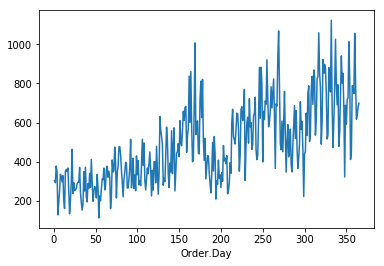

In [10]:
orders.groupby('Order.Day')['Quantity'].sum().plot()

**This plots implies there is seasonal trend, so we can investigate if the series are influenced by the month.**

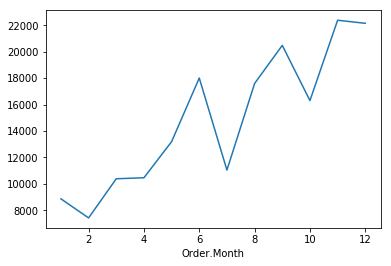

In [11]:
orders.groupby('Order.Month')['Quantity'].sum().plot()

**Is the seasonal trend the same for different categories?**

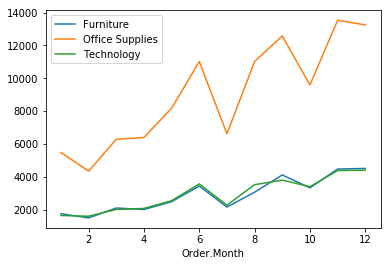

In [12]:
for index, group in orders.groupby(['Category']):
    group_agg = group.groupby(['Order.Month'])['Quantity'].sum()
    group_agg.plot(y='Quantity', label=index, legend=True)

**Looks like there is a peak during the holiday seasons and big drops in July and October.**

### Problem 3: Why did customers make returns?
**How much profit did we lose due to returns each year?**

In [13]:
returns = pd.read_csv('data/Returns.csv')

In [14]:
returns.shape

(1079, 3)

In [15]:
returns.sample(5)

,Returned,Order ID,Region
270,Yes,MO-2014-MO795086-41706,North Africa
423,Yes,MX-2015-MY1829582-42321,Central America
767,Yes,IN-2014-IM1507058-41812,Southern Asia
166,Yes,SA-2013-JD6150110-41600,Western Asia
552,Yes,IN-2015-RH196007-42179,Oceania


In [16]:
# Region is contained in both dataframes
returns = returns.drop('Region', axis=1).merge(orders, how='left', left_on='Order ID', right_on='Order.ID')

In [17]:
returns.shape

(2220, 28)

In [18]:
returns['Order.Year'] = returns['Order.Date'].dt.year

In [19]:
returns.dtypes

Returned                  object
Order ID                  object
Row.ID                     int64
Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date         datetime64[ns]
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
Order.Month                int64
Order.Day                  int64
Order.Year                 int64
dtype: object

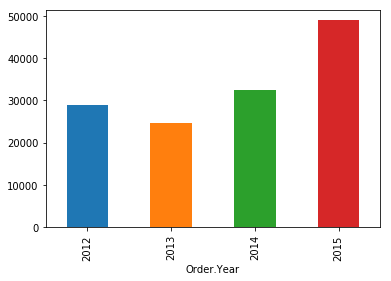

In [20]:
# Profit could be negative so we need to sum the absolute values
returns.groupby('Order.Year')['Profit'].apply(lambda c: c.abs().sum()).plot.bar()

**How many customer returned more than once? more than 5 times?**

In [21]:
len(returns.groupby('Customer.ID').filter(lambda x: len(x) > 1)['Customer.ID'].unique())

547

In [22]:
len(returns.groupby('Customer.ID').filter(lambda x: len(x) > 5)['Customer.ID'].unique())

46

**Which regions are more likely to return orders?**

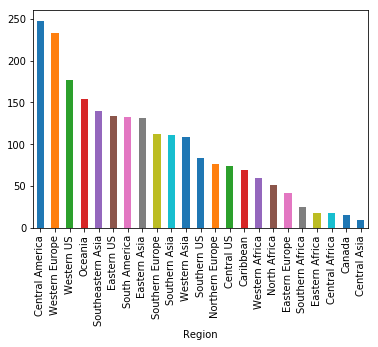

In [23]:
returns.groupby('Region').size().sort_values(ascending=False).plot.bar()

**Which categories (sub-categories) of products are more likely to be returned**

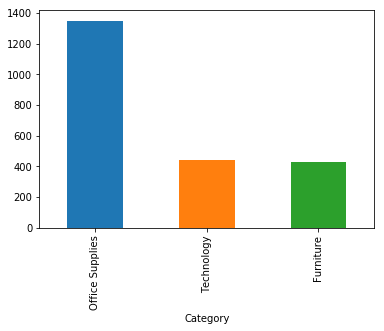

In [24]:
returns.groupby('Category').size().sort_values(ascending=False).plot.bar()

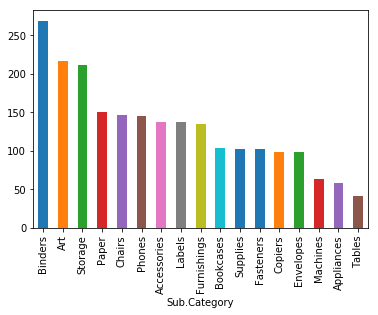

In [25]:
returns.groupby('Sub.Category').size().sort_values(ascending=False).plot.bar()

## Part II: Machine Learning and Business Use-Case

Now your manager has a basic idea of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable

In [26]:
orders['Returned'] = orders['Order.ID'].isin(returns['Order ID'])
orders['Returned'] = orders['Returned'].map(lambda x: 1 if x is True else 0)

In [27]:
orders.sample(5)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Day,Returned
4165,22483,IN-2012-RR1952527-41162,2012-09-10,2012-09-12,Second Class,RR-1952527,Rick Reed,Corporate,NaN,Shanghai,Shanghai,China,Eastern Asia,Asia Pacific,OFF-AP-4510,Office Supplies,Appliances,"Hamilton Beach Toaster, Red",287.55,5,0.0,123.60,77.64,High,9,254,0
36081,44330,NI-2015-TC1098095-42033,2015-01-29,2015-01-29,Same Day,TC-1098095,Tamara Chand,Corporate,NaN,Aba,Abia,Nigeria,Western Africa,Africa,FUR-CH-4633,Furniture,Chairs,"Hon Chairmat, Set of Two",17.33,1,0.7,-27.76,3.27,High,1,29,0
49357,36800,CA-2015-TH21115140-42311,2015-11-03,2015-11-07,Standard Class,TH-211151406,Thea Hudgings,Corporate,19140.0,Philadelphia,Pennsylvania,United States,Eastern US,USCA,OFF-AP-3505,Office Supplies,Appliances,Black & Decker Filter for Double Action Dustbu...,20.14,3,0.2,1.26,1.87,Medium,11,307,0
31291,32315,CA-2013-KM16225140-41461,2013-07-06,2013-07-10,Standard Class,KM-162251406,Kalyca Meade,Corporate,10011.0,New York City,New York,United States,Eastern US,USCA,TEC-PH-5533,Technology,Phones,OtterBox Commuter Series Case - Samsung Galaxy S4,124.95,5,0.0,2.50,13.57,High,7,187,0
42539,22656,IN-2014-BT113957-41696,2014-02-26,2014-03-05,Standard Class,BT-113957,Bill Tyler,Corporate,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,OFF-FA-3053,Office Supplies,Fasteners,"Advantus Push Pins, 12 Pack",12.47,1,0.1,5.54,1.90,Medium,2,57,0


#### Step 2: Time to ship feature

In [28]:
orders['Process.Time'] = orders['Ship.Date']- orders['Order.Date']
orders['Process.Time'] = orders['Process.Time'].dt.days
orders['Process.Time'].head()

0    2
1    2
2    1
3    2
4    1
Name: Process.Time, dtype: int64

#### Step 3: Number of return times

In [29]:
# Need a dataframe to merge later
return_summary = returns.groupby('Product.ID').size().reset_index(name ='Return.Times')
return_summary.head()

,Product.ID,Return.Times
0,FUR-BO-3176,1
1,FUR-BO-3615,1
2,FUR-BO-3616,1
3,FUR-BO-3621,1
4,FUR-BO-3624,2


In [30]:
orders = orders.merge(return_summary, how='left', on='Product.ID', suffixes=['', '_'])
orders['Return.Times'] = orders['Return.Times'].fillna(0)

### Problem 5: Fitting Models

#### Step 1: Select the columns to use

In [31]:
use_columns = ['Sales', 'Quantity', 'Discount', 'Process.Time', 'Return.Times', 'Shipping.Cost', 'Segment',
               'Ship.Mode', 'Region', 'Category', 'Order.Month', 'Order.Priority','Profit']

In [32]:
X = pd.get_dummies(orders[use_columns], drop_first=True, dummy_na=True)
y = orders['Returned']

In [34]:
X.head()

,Sales,Quantity,Discount,Process.Time,Return.Times,Shipping.Cost,Order.Month,Profit,Segment_Corporate,Segment_Home Office,Segment_nan,Ship.Mode_Same Day,Ship.Mode_Second Class,Ship.Mode_Standard Class,Ship.Mode_nan,...,Region_Southern Asia,Region_Southern Europe,Region_Southern US,Region_Western Africa,Region_Western Asia,Region_Western Europe,Region_Western US,Region_nan,Category_Office Supplies,Category_Technology,Category_nan,Order.Priority_High,Order.Priority_Low,Order.Priority_Medium,Order.Priority_nan
0,221.98,2,0.0,2,0.0,40.77,11,62.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,3709.40,9,0.1,2,2.0,923.63,2,-288.77,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5175.17,9,0.1,1,2.0,915.49,10,919.97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,2892.51,5,0.1,2,0.0,910.16,1,-96.54,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,2832.96,8,0.0,1,0.0,903.04,11,311.52,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Returned, dtype: int64

#### Step 2: Train/test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Step 3: Fit a logistic regression model

In [37]:
from sklearn.linear_model import LogisticRegression
# Since this is an imbalanced dataset, setting class_weight='balanced' will give us a better result
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

C:\Users\asus\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Step 4: Evaluate your logistic regression model

In [38]:
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(y_test, y_predict)

array([[7139, 2675],
       [ 141,  303]], dtype=int64)

In [39]:
# This is an imbalanced dataset so I would achieve more than 95% accuracy rate even if I always predict 'No'. 
# In this case, accuracy is not a good metric. ROC curve or F1 score works better for this task.
roc_auc_score(y_test, y_predict)

0.7049313170925153

#### Step 5: Fit a random forest model

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=9, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

#### Step 6: Evaluate your random forest model

In [41]:
confusion_matrix(y_test, y_predict)

array([[5055, 4759],
       [  49,  395]], dtype=int64)

In [42]:
roc_auc_score(y_test, y_predict)

0.7023600684442339

- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case?
- How will your model help the manager make decisions? 
- It really depends your understanding of the business model. For example, if I find a product that has a high probability that will get returned, I would recommend my manager to put it on final sale so the customer get it for a lower price but they are not allowed to return the product. However, if the product turned out to be just fine and we are losing profit because we give it a discount. In that case, I would prefer a model that has a relatively good accuracy with better precision (lower Type I error). 

### Problem 6:
Is there anything wrong with the feature engineering process? How should we fix it?

- The `Return.Times` feature was wrong. If we want to use training data set to fit a model and test dataset to test a model, we assume test dataset is new data we get after fitting the model. But using the whole dataset to count the times will actually indicate these items will be returned in the test dataset. That's why the process is invalid.

- The easiest way to fix the problem is to split the train and test set by different timespan. You can use 2012-2014 data for training and 2015 data as testing. It will mimic the same scenario in real life: **you don't know what's going to happen in the future :)**

- A great [blog post](http://www.fast.ai/2017/11/13/validation-sets/) from fast.ai discussing this problem.